In [1]:
#pip install hurst statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from regime_indicators import rolling_hurst, plot_regime_indicators, detect_high_vol, plot_vol_regime, plot_adf_regime, rolling_adf
plt.style.use('dark_background')

In [3]:
df = pd.read_parquet('ETHUSDT.parquet')
df = df['2024-03':'2024-10']
df.shape

(9244, 13)

<Axes: xlabel='close_time'>

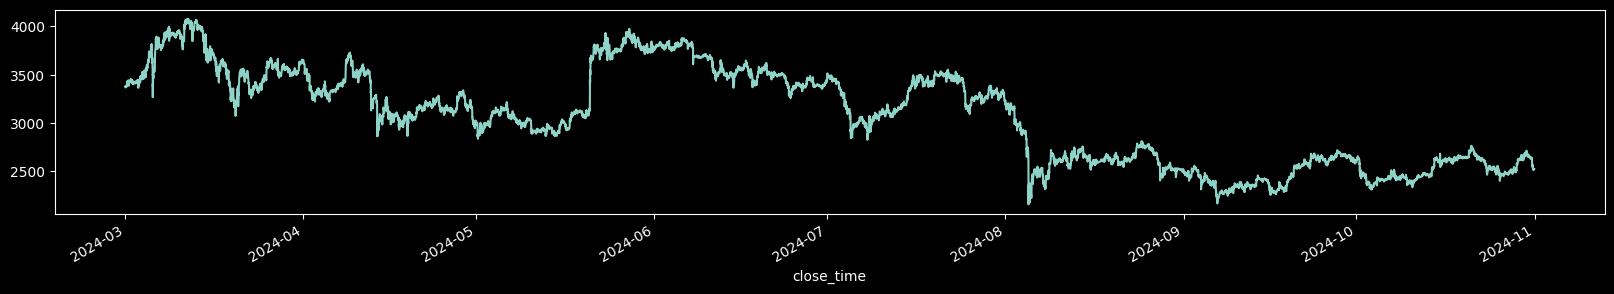

In [4]:
df.close.plot(figsize=(20,3))

---
Filtre de mémoire avec Hurst Exponent

In [5]:
# Calculate indicators with a 100-period window
window_size = 200
df['hurst'] = rolling_hurst(df['close'], window_size)

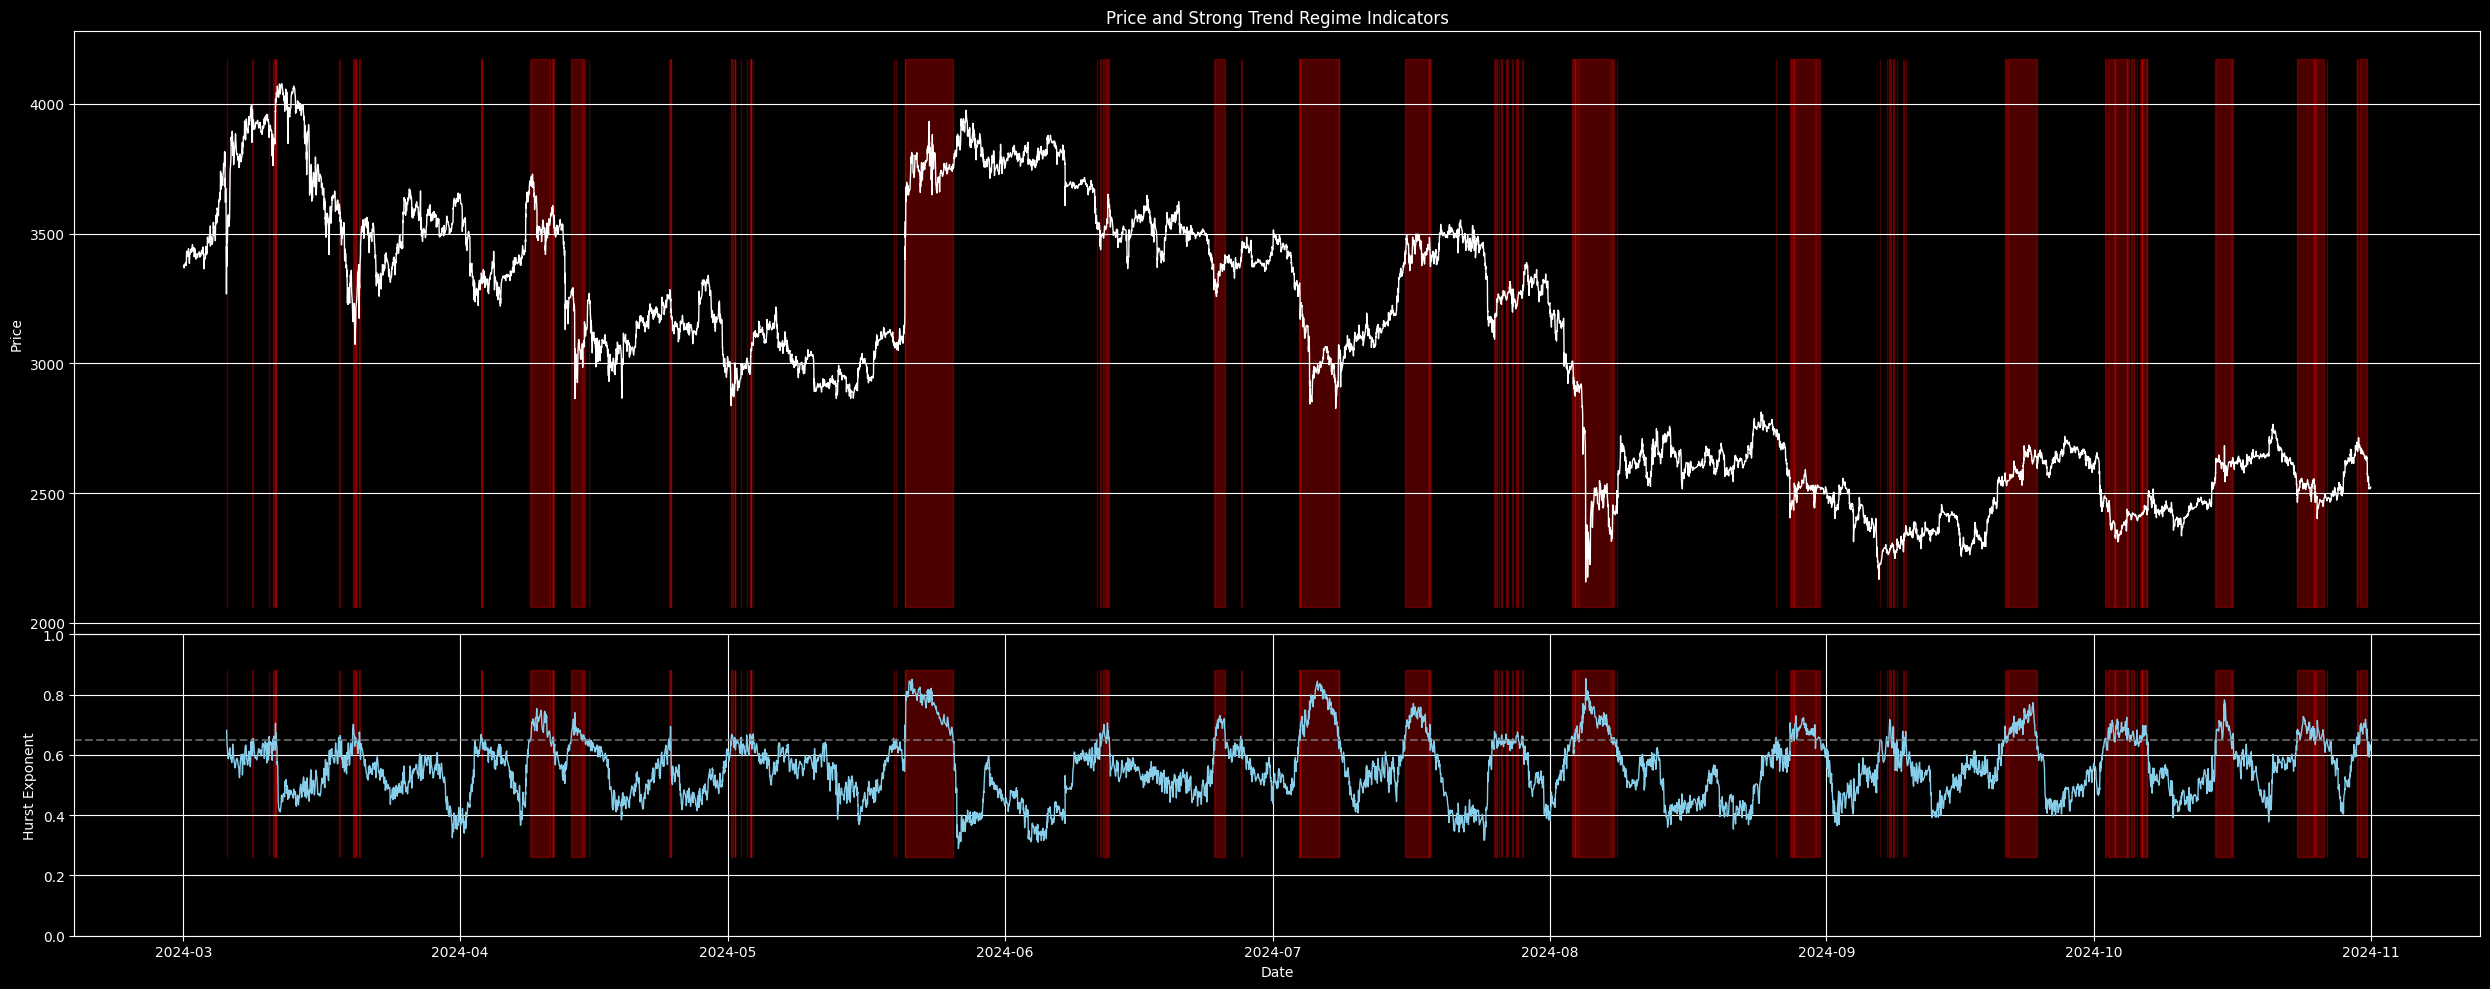

In [6]:
# After calculating your indicators
fig = plot_regime_indicators(df, figsize=(25,10), threshold=0.65)
plt.show()

---
Filtre de volatilité avec Déviation Standard (std)

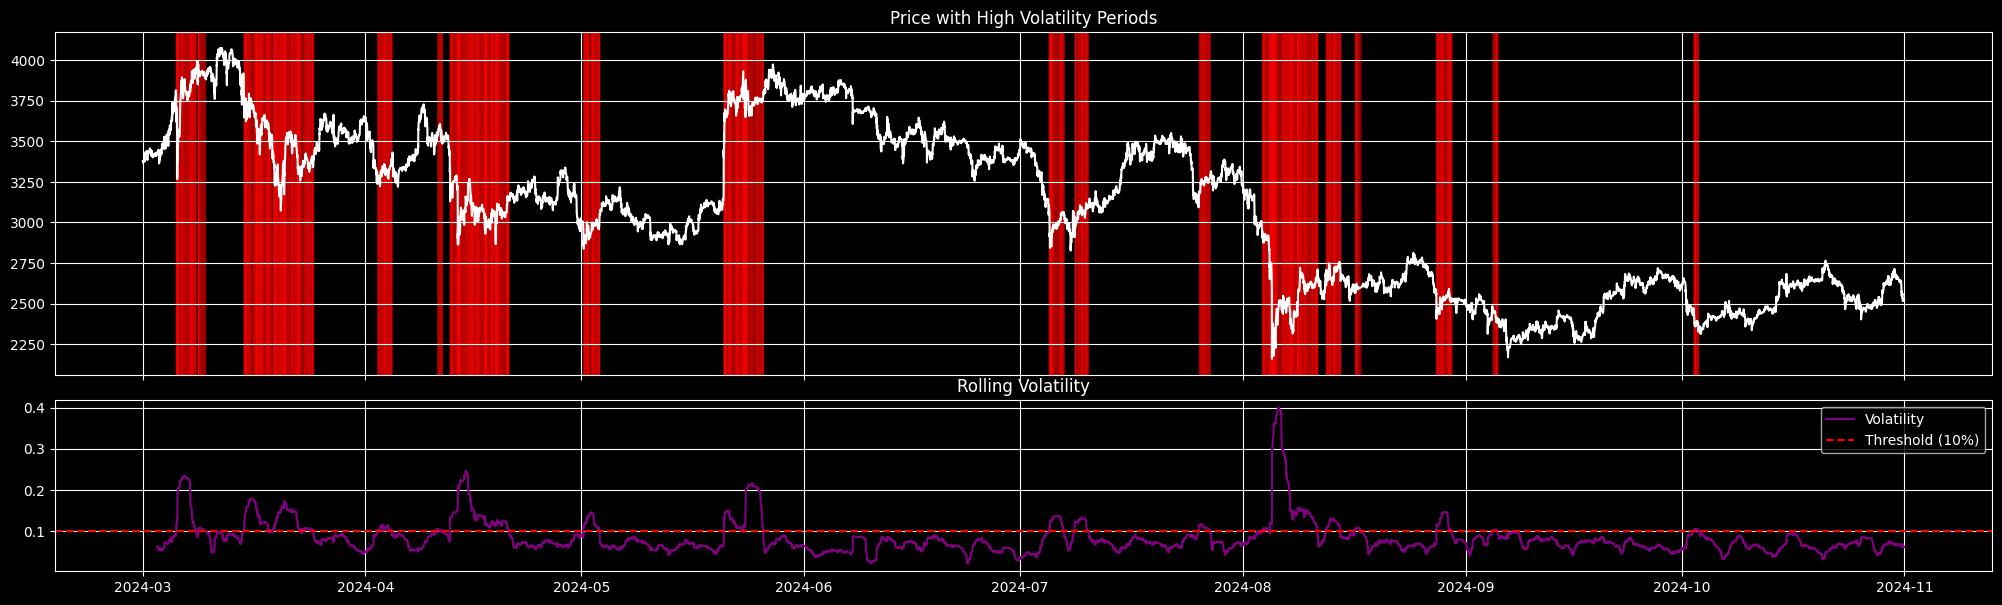

In [7]:
# To visualize
fig = plot_vol_regime(df, 
                window=50, 
                threshold=0.10,
                figsize=(25,7))

---
Filtre ADF (stationnarité)

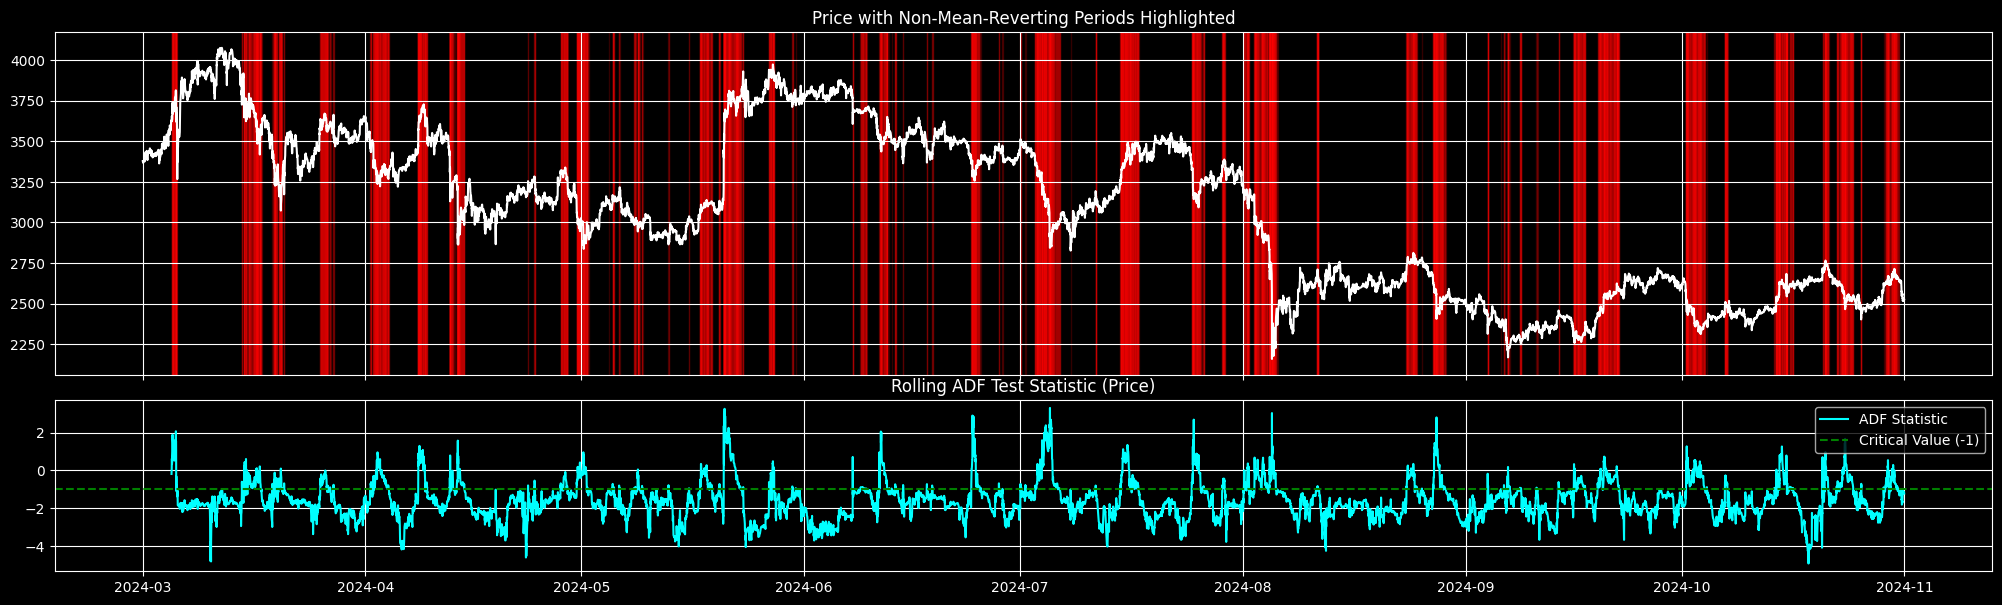

In [8]:
fig = plot_adf_regime(df, price_col='close', window=150, critical_value=-1, figsize=(25,7), use_returns=False)